In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model

In [2]:
# load dataset
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# explore data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB
None


In [4]:
# explore categorical variables
print(data.sex.unique())
print(data.smoker.unique())
print(data.day.unique())
print(data.time.unique())

[Female, Male]
Categories (2, object): [Female, Male]
[No, Yes]
Categories (2, object): [No, Yes]
[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


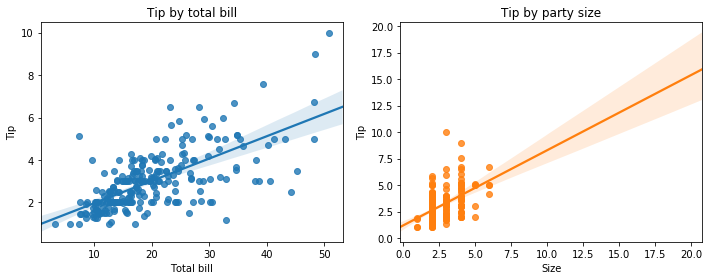

In [5]:
# plot total bill and size vs tip
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
ax = sns.regplot(data['total_bill'], data['tip'], ax = axes[0])
ax.set(title = 'Tip by total bill', xlabel = 'Total bill', ylabel = 'Tip')
ax = sns.regplot(data['size'], data['tip'], ax = axes[1])
ax.set(title = 'Tip by party size', xlabel = 'Size', ylabel = 'Tip')
plt.tight_layout()

In [6]:
# build model with one predictor (using statsmodels)
model = smf.ols(formula = 'tip ~ total_bill', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           6.69e-34
Time:                        06:01:20   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [7]:
# build model with two predictors (using statsmodels)
model = smf.ols(formula = 'tip ~ total_bill + size', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           9.67e-34
Time:                        06:01:25   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

In [8]:
# build model with all predictors (using statsmodels)
model = smf.ols(formula = 'tip ~ total_bill + size + sex + smoker + day + time', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           1.20e-28
Time:                        06:01:28   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.

In [9]:
# build interaction model (using statsmodels)
model = smf.ols(formula = 'tip ~ total_bill * size', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.51
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           9.82e-33
Time:                        06:01:33   Log-Likelihood:                -347.84
No. Observations:                 244   AIC:                             703.7
Df Residuals:                     240   BIC:                             717.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9183      0.510     

In [10]:
# build model with one predictor (using sklearn)
model = linear_model.LinearRegression()
predicted = model.fit(X = data['total_bill'].values.reshape(-1, 1), y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data['total_bill'].values.reshape(-1, 1), y = data['tip']) # print R squared

[0.10502452]
0.9202696135546731


0.45661658635167657

In [11]:
# build model with two predictors (using sklearn)
model = linear_model.LinearRegression()
predicted = model.fit(X = data[['total_bill', 'size']], y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data[['total_bill', 'size']], y = data['tip']) # print R squared

[0.09271334 0.19259779]
0.6689447408125027


0.46786930879612587

In [12]:
# create dummy variables
data_dummy = pd.get_dummies(data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']])
print(data_dummy.head())

   total_bill  size  sex_Male  sex_Female  smoker_Yes  smoker_No  day_Thur  \
0       16.99     2         0           1           0          1         0   
1       10.34     3         1           0           0          1         0   
2       21.01     3         1           0           0          1         0   
3       23.68     2         1           0           0          1         0   
4       24.59     4         0           1           0          1         0   

   day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
0        0        0        1           0            1  
1        0        0        1           0            1  
2        0        0        1           0            1  
3        0        0        1           0            1  
4        0        0        1           0            1  


In [13]:
# create dummy variables and drop reference variable
data_dummy = pd.get_dummies(data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']], drop_first = True)
print(data_dummy.head())

   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99     2           1          1        0        0        1   
1       10.34     3           0          1        0        0        1   
2       21.01     3           0          1        0        0        1   
3       23.68     2           0          1        0        0        1   
4       24.59     4           1          1        0        0        1   

   time_Dinner  
0            1  
1            1  
2            1  
3            1  
4            1  


In [14]:
# build model with all predictors (using sklearn)
model = linear_model.LinearRegression()
predicted = model.fit(X = data_dummy, y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data_dummy, y = data['tip']) # print R squared

[ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ]
0.5908374259513769


0.47007812322060794

In [15]:
# build interaction model (using sklearn)
data_interaction = pd.concat([data[['total_bill', 'size']], data['total_bill'] * data['size']], axis = 1)
model = linear_model.LinearRegression()
predicted = model.fit(X = data_interaction, y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data_interaction, y = data['tip']) # print R squared

[0.08188122 0.09326945 0.00394066]
0.918271474719274


0.4684883881380394

In [16]:
# build ridge regression model (using sklearn)
model = linear_model.Ridge(alpha = 1)
predicted = model.fit(X = data_dummy, y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data_dummy, y = data['tip']) # print R squared

[ 0.09444287  0.17543019  0.03130795  0.08304953  0.1267268  -0.00076844
  0.094863   -0.03026345]
0.5989686672210008


0.4700566055867049

In [17]:
# build LASSO regression model (using sklearn)
model = linear_model.Lasso(alpha = 1)
predicted = model.fit(X = data_dummy, y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data_dummy, y = data['tip']) # print R squared

[ 0.09235476  0.         -0.          0.         -0.         -0.
  0.          0.        ]
1.1709526368292176


0.4499714078607421

In [18]:
# build elastic net model (using sklearn)
model = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
predicted = model.fit(X = data_dummy, y = data['tip'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = data_dummy, y = data['tip']) # print R squared

[ 0.09806839  0.          0.          0.         -0.         -0.
  0.          0.        ]
1.057903165346604


0.454613473403629